# Heart disease data preparation
Second attempt on the first deliverable in the course *Artificial intelligence applied to engineering* at ETSEIB, UPC spring 2024. The team members contributing to the deliverable is 
- Lise Jakobsen
- Julie Sørlie Lund
- Magnus Ingnes Sagmo

The dataset used in this deliverable can be retrieved from [Kaggle](https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset).

### 1. Initial data set information

The data set has 12 non-null features, including the target column `HeartDisease`. There are a total of 918 samples.



In [1]:
import pandas as pd
pd.set_option('future.no_silent_downcasting', True)

heart_data = pd.read_csv("heart.csv")
heart_data.info()

heart_data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


### 2. Peeking at the head to understand the data structure


In [2]:
heart_data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


### 3. Data types
There are no null values for any of the features.

- `Age`, `int64`. Sensible data type for age. The lowest age is 28 and the highest is 77, well within the range of normal human life. 
- `Sex`, `object`. The values of this column is either 'M' or 'F'. We convert to numerical representation where `'M'=1` and `'F'=0`.
- `ChestPainType`, `object`. he values of this column is either 'ATA', 'NAP', 'ASY', or 'TA'.
- `RestingBP`, `int64`. Sensible data type for blood pressure. The values range between 0 and 200, which indicates an error for some values (a living human can not have a resting blood pressure of 0). 
- `Cholesterol`, `int64`.Sensible data type for cholesterol. As with `RestingBP`, the presence of 0-values may indicate faulty samples. 
- `FastingBS`, `int64`. This feature says whether the pasient has a fasting blood sugar level higher than 120 mg/dl, and is therefore either 0 or 1. We convert this column to categorical. 
- `RestingECG`, `object`. Sensible data type for resting electrocardiographic results. Can take the values 'Normal', 'ST' or 'LVH'.
- `MaxHR`, `int64`. Sensible data type for maximum heart rate.
- `ExerciseAngina`, `object`. This is a binary attribute, saying if the pasient has an exercise induced angina or not. We transform it to a numerical value of 0 or 1. 
- `Olpeak`, `float64`. Sensible data type. There are negative values, which may be looked into. #TODO
- `ST_Slope`, `object`. Saying whether the slope of the exercise ST segment is decresing ('Down'), stable ('Flat') or increasing ('Up').  As the values are ordered, they can be converted to numerical values without losing their meaning. 
- `HeartDisease`, `int64`. Binary number saying whether the pasient has a heart disease or not. Sensible data type.



In [3]:
heart_data.info()
heart_data.describe()
heart_data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
# Convert Sex and ExerciseAngina columns to numerical dtype
heart_data['Sex'] = heart_data['Sex'].replace({'F': 0, 'M': 1}).astype('int')
heart_data['ExerciseAngina'] = heart_data['ExerciseAngina'].replace({'Y': 0, 'N': 1}).astype('int')

# Convert ST_Slope to numerical
heart_data['ST_Slope'] = heart_data['ST_Slope'].replace({'Down': 0, 'Flat': 1, 'Up': 2}).astype('int')

heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    int64  
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    int64  
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    int64  
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(9), object(2)
memory usage: 86.2+ KB


### 3. Filter irrelevant variables
All variables are possibly relevant for diagnosing heart disease, and will be kept.

### 4. Univariate analysis
- `Age` has a reasonable distribution.
- `RestingBP` has one impossible zero-value. The rest of the values are well distributed within a sensible range.  
- `Cholesterol` has a high number of impossible zero-values. The rest of the values are well distributed within a sensible range. 
- `MaxHR` has well-distributed values within a sensible range. 
- `Oldpeak` has 13 negative values, which may be impossible. It also has a majority of 0-values. 
- `Sex`: 78% of the pasients are male. 
- `ChestPainType` has the following distribution:
ASY - 496, NAP - 203, ATA - 173, TA - 46. 
- `FastingBS`: 76% of the pasients does not have a a fasting blood sugar level higher than 120 mg/dl.
- `RestingECG`: The majority (60%) of the pasients have normal resting ECG. The rest are fairly evenly distirbuted between LVH and ST.
- `ExerciceAngina` has a distribution of 547 to 351.
- `ST_Slope`: Only a small portion (7%) has negative slope, whereas the rest are evenly distributed between flat and positive. 



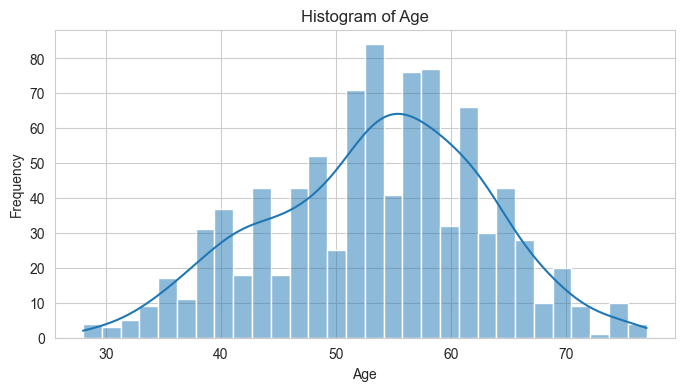

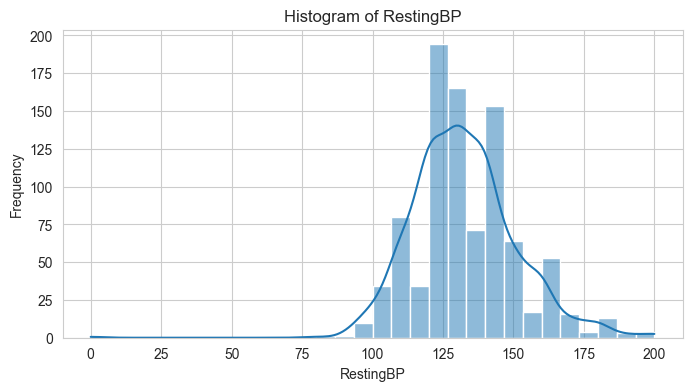

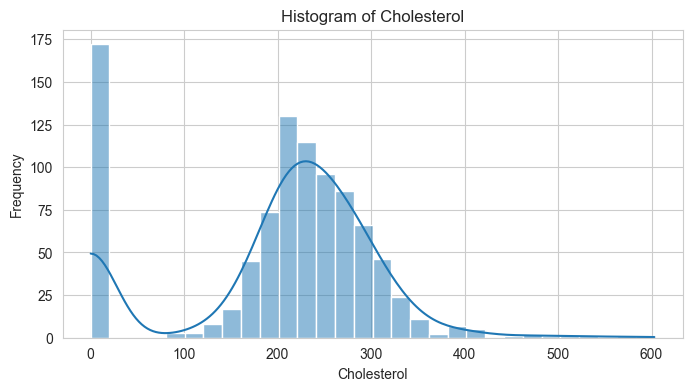

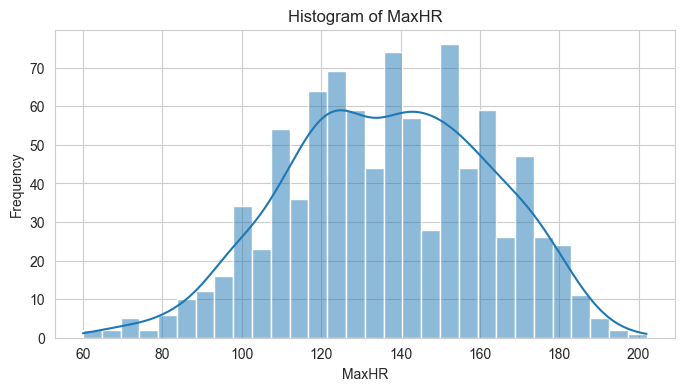

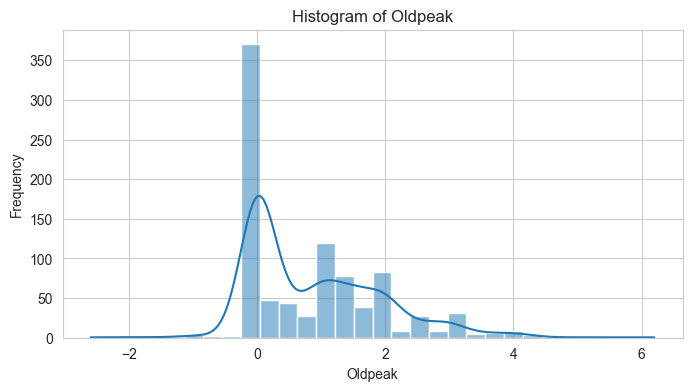

Frequency distribution for Sex:
Sex
1    725
0    193
Name: count, dtype: int64


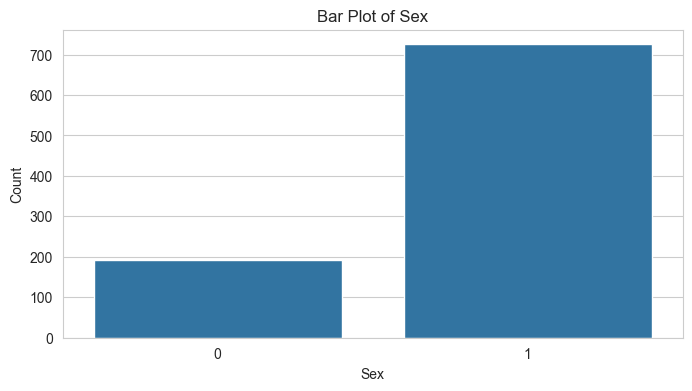

Frequency distribution for ChestPainType:
ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64


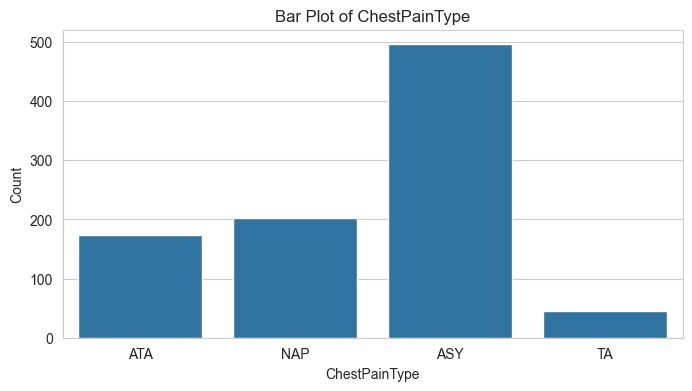

Frequency distribution for FastingBS:
FastingBS
0    704
1    214
Name: count, dtype: int64


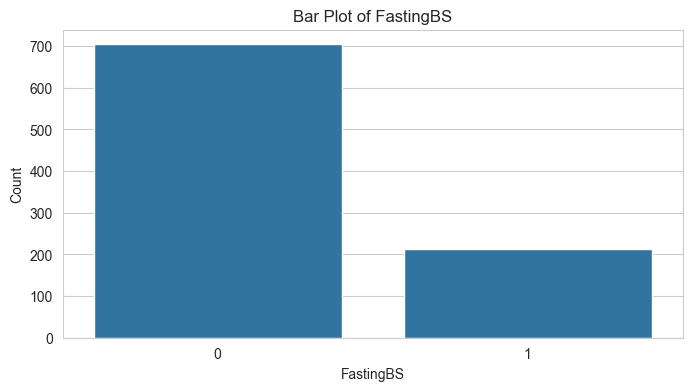

Frequency distribution for RestingECG:
RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64


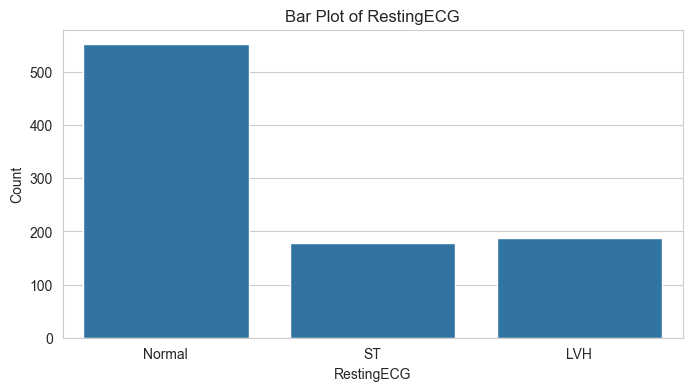

Frequency distribution for ExerciseAngina:
ExerciseAngina
1    547
0    371
Name: count, dtype: int64


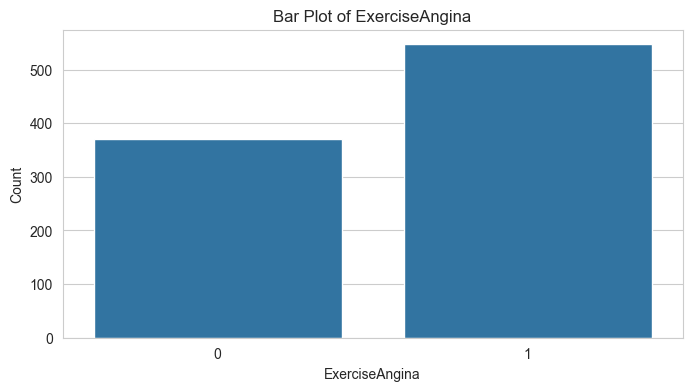

Frequency distribution for ST_Slope:
ST_Slope
1    460
2    395
0     63
Name: count, dtype: int64


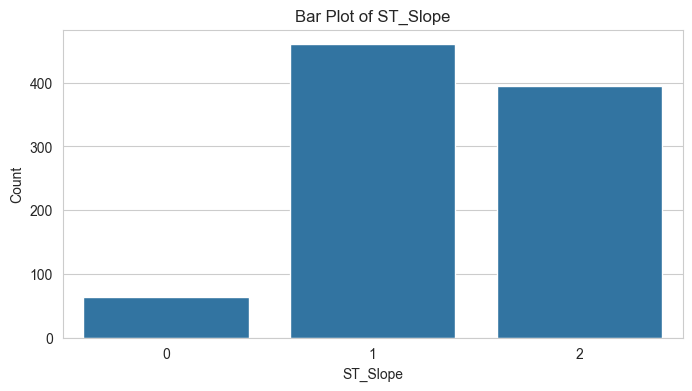

In [5]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of the plots
sns.set_style("whitegrid")

def show_figures():
    numerical_columns = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
    # Histograms for numerical variables
    for col in numerical_columns:
        plt.figure(figsize=(8, 4))
        sns.histplot(heart_data[col], kde=True, bins=30)
        plt.title(f'Histogram of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.show()

    # Frequency distribution and bar plots for categorical variables
    categorical_columns = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
    for col in categorical_columns:
        print(f"Frequency distribution for {col}:")
        print(heart_data[col].value_counts())
        
        plt.figure(figsize=(8, 4))
        sns.countplot(x=col, data=heart_data)
        plt.title(f'Bar Plot of {col}')
        plt.ylabel('Count')
        plt.show()

show_figures()

In [ ]:
def show_boxplots():
    plt.figure(figsize=(8, 4))
    sns.boxplot(heart_data['Age'])
    plt.show()
    plt.figure(figsize=(8, 4))
    sns.boxplot(heart_data['Cholesterol'])
    plt.show()
    plt.figure(figsize=(8, 4))
    sns.boxplot(heart_data['RestingBP'])
    plt.show()
    plt.figure(figsize=(8, 4))
    sns.boxplot(heart_data['Cholesterol'])
    plt.show()

show_boxplots()


In [7]:
# Number of negative values for Oldpeak
(heart_data['Oldpeak'] < 0).sum()

13

### 5. Encode categorical values

In [8]:
# One-hot encode ChestPainType and RestingECG
heart_data = pd.get_dummies(heart_data, columns=['ChestPainType', 'RestingECG'], dtype='int')
heart_data.describe()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,0.789760,132.396514,198.799564,0.233115,136.809368,0.595861,0.887364,1.361656,0.553377,0.540305,0.188453,0.221133,0.050109,0.204793,0.601307,0.193900
std,9.432617,0.407701,18.514154,109.384145,0.423046,25.460334,0.490992,1.066570,0.607056,0.497414,0.498645,0.391287,0.415236,0.218289,0.403770,0.489896,0.395567
min,28.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,1.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,54.000000,1.000000,130.000000,223.000000,0.000000,138.000000,1.000000,0.600000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,60.000000,1.000000,140.000000,267.000000,0.000000,156.000000,1.000000,1.500000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,77.000000,1.000000,200.000000,603.000000,1.000000,202.000000,1.000000,6.200000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
# heart_data.describe()
# heart_data['ChestPainType_NAP'].unique()
heart_data.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST
0,40,1,140,289,0,172,1,0.0,2,0,0,1,0,0,0,1,0
1,49,0,160,180,0,156,1,1.0,1,1,0,0,1,0,0,1,0
2,37,1,130,283,0,98,1,0.0,2,0,0,1,0,0,0,0,1
3,48,0,138,214,0,108,0,1.5,1,1,1,0,0,0,0,1,0
4,54,1,150,195,0,122,1,0.0,2,0,0,0,1,0,0,1,0


### 6. Outliers
`RestingBP` has 28 outliers in total, `Cholesterol` has 11 high outliers, `MaxHR` has 2 outliers in total and `Oldpeak` has 16 outliers in total. This accounts for the a total of 6% of the data set, and can safely be removed. 

`Cholesterol` has 172 zero-values. This is an impossible value, as a living person can not have 0 cholesterol. 172 instances accounts for close to one fifth of the data set - a too high number to simply be removed. We are therefore opting to either replace the zero-values with the median, or to use `sklearn.IterativeImputer`.

In [10]:
def IQR_bounds(dataframe, column, lower_quantile=0.25, upper_quantile=0.75, should_print=True):
    ''''Calculate limit for outliers for a given column using the IQR method

    The IQR is the difference between the 75th percentile (Q3) and the 25th percentile (Q1) of the data.
    Outliers are typically considered data points that fall below (Q1- 1,5*IQR) or above (Q3 + 1,5*IQR).
    
    Parameters
    ----------
    dataframe : pandas.DataFrame
        The data to locate outliers in 
    column : str
        Name of column to locate outliers in
    lower_quantile : float
        Quantile to represent the lower bound (default is 0.25 for Q1)
    upper_quantile : float
        Quantile to represent the upper bound (default is 0.75 for Q3)

    Returns
    -------
    int
        Lower bound for outliers
    int 
        Upper bound for outliers
    '''

    Q1, Q3 = dataframe[column].quantile([lower_quantile, upper_quantile])
    # Q3 = dataframe[column].quantile(upper_quantile)

    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    low_outliers = (dataframe[column] < lower_bound).sum()
    high_outliers = (dataframe[column] > upper_bound).sum()

    if should_print:
        print(f'{column} has {low_outliers} low outliers and {high_outliers} high outliers')

    return lower_bound, upper_bound



In [11]:
IQR_bounds(heart_data, 'Age', 0.25, 0.75)
IQR_bounds(heart_data, 'RestingBP', 0.25, 0.75)
IQR_bounds(heart_data, 'Cholesterol', 0.25, 0.75)
IQR_bounds(heart_data, 'MaxHR', 0.25, 0.75)
IQR_bounds(heart_data, 'Oldpeak', 0.25, 0.75)


Age has 0 low outliers and 0 high outliers
RestingBP has 2 low outliers and 26 high outliers
Cholesterol has 172 low outliers and 11 high outliers
MaxHR has 2 low outliers and 0 high outliers
Oldpeak has 1 low outliers and 15 high outliers


(-2.25, 3.75)

#### Remove outliers

In [12]:
def remove_outliers(dataframe):
    restingbp_l, restingbp_h = IQR_bounds(heart_data, 'RestingBP', 0.25, 0.75, should_print=False)
    cholesterol_l, cholesterol_h = IQR_bounds(heart_data, 'Cholesterol', 0.25, 0.75, should_print=False)
    maxhr_l, maxhr_h = IQR_bounds(heart_data, 'MaxHR', 0.25, 0.75, should_print=False)
    oldpeak_l, oldpeak_h = IQR_bounds(heart_data, 'Oldpeak', 0.25, 0.75, should_print=False)

    print(f'Total entries before removing outliers: {dataframe.shape[0]}')
    
    dataframe = dataframe[(dataframe['RestingBP'] >= restingbp_l) & (dataframe['RestingBP'] <= restingbp_h)]
    dataframe = dataframe[(dataframe['Cholesterol'] <= cholesterol_h)]
    dataframe = dataframe[(dataframe['MaxHR'] >= maxhr_l) & (dataframe['MaxHR'] <= maxhr_h)]
    dataframe = dataframe[(dataframe['Oldpeak'] >= oldpeak_l) & (dataframe['Oldpeak'] <= oldpeak_h)]

    print(f'Total entries after removing outliers: {dataframe.shape[0]}')
    return dataframe

    

In [13]:
heart_data = remove_outliers(heart_data)

heart_data.head()


Total entries before removing outliers: 918
Total entries after removing outliers: 863


,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST
0,40,1,140,289,0,172,1,0.0,2,0,0,1,0,0,0,1,0
1,49,0,160,180,0,156,1,1.0,1,1,0,0,1,0,0,1,0
2,37,1,130,283,0,98,1,0.0,2,0,0,1,0,0,0,0,1
3,48,0,138,214,0,108,0,1.5,1,1,1,0,0,0,0,1,0
4,54,1,150,195,0,122,1,0.0,2,0,0,0,1,0,0,1,0


#### Impute zero cholesterol values

In [14]:
from sklearn.impute import KNNImputer

def impute_zero(dataframe, column, use_simple=True):
    ''''Impute zero values 

    Apply either median replacement or sklearn.KNNImputer to 
    replace zero-values.
    
    Parameters
    ----------
    dataframe : pandas.DataFrame
        The data to locate outliers in 
    column : str
        Name of column to locate outliers in
    use_simple : bool
        Whether to impute with median (True) or use sklearn.KNNImputer (False)

    Returns
    -------
    pandas.DataFrame
        Dataframe with imputed values
    '''
    df = dataframe.copy()
    if use_simple:
        median = dataframe[column].median()
        df[column] = df[column].replace(to_replace=0, value=median)
    else:
        imputer = KNNImputer(n_neighbors=10, weights='uniform', missing_values=0)
        imputed = imputer.fit_transform(df)
        imputed_df = pd.DataFrame(imputed, columns=df.columns)
        df[column] = imputed_df[column]

    return df

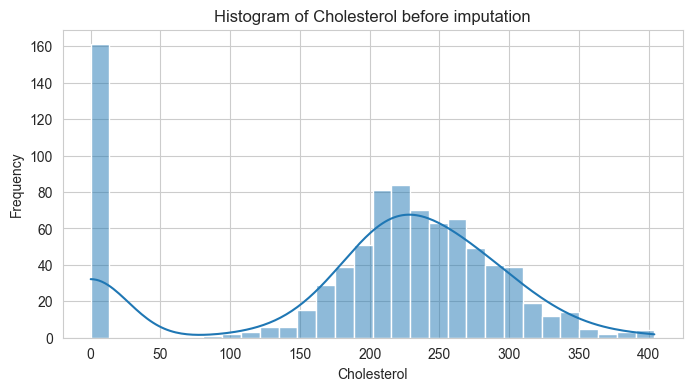

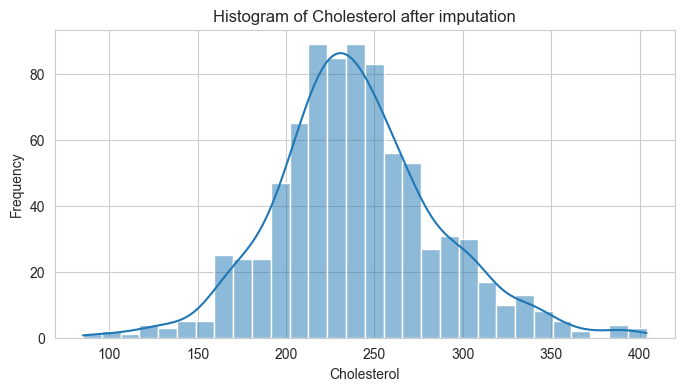

In [15]:

plt.figure(figsize=(8, 4))
sns.histplot(heart_data['Cholesterol'], kde=True, bins=30)
plt.title(f'Histogram of Cholesterol before imputation')
plt.xlabel('Cholesterol')
plt.ylabel('Frequency')
plt.show()

heart_data = impute_zero(heart_data, "Cholesterol", use_simple=False)

plt.figure(figsize=(8, 4))
sns.histplot(heart_data['Cholesterol'], kde=True, bins=30)
plt.title(f'Histogram of Cholesterol after imputation')
plt.xlabel('Cholesterol')
plt.ylabel('Frequency')
plt.show()



### 6. Bivariate analysis

None of the features have a significantly high correlation to the target feature.

In [16]:
methods = ['pearson', 'kendall', 'spearman']
for method in methods:
    matrix = heart_data.corr(method=method)
    series = abs(matrix['HeartDisease']).sort_values()

    print(f'Features with relevance higher than 0.6 using {method} correlation:')

    count = 0
    for val in series.items():
        if val[1] > 0.6 and val[0] != 'HeartDisease':
            print(f'{val[0]} with relevance {val[1]}')
            count += 1
    if count == 0:
        print("No highly features with relevance higher than 0.6")
        print('')

Features with relevance higher than 0.6 using pearson correlation:
No highly features with relevance higher than 0.6

Features with relevance higher than 0.6 using kendall correlation:
No highly features with relevance higher than 0.6

Features with relevance higher than 0.6 using spearman correlation:
No highly features with relevance higher than 0.6



### 7. Split into training and test

In [17]:
from sklearn.model_selection import train_test_split

X = heart_data.copy()
y = X['HeartDisease']
X = X.drop('HeartDisease', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### 8. Scale the data

The most appropriate method of scaling is dependent on the nature of the data and the classification methods we will use in the next part of the project. We will therefore make a method implementing both MinMax scaling and Standard scaling.

In [18]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
def scale(X_train, X_test, method='min_max'):
    if method == 'min_max':
        scaler = MinMaxScaler()
    else:
        scaler = StandardScaler()
    
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    return X_train, X_test

In [19]:
X_train, X_test = scale(X_train, X_test)